📊 Model Evaluation on Test Data:
MAE  = 0.00
RMSE = 0.00
R²   = 1.00


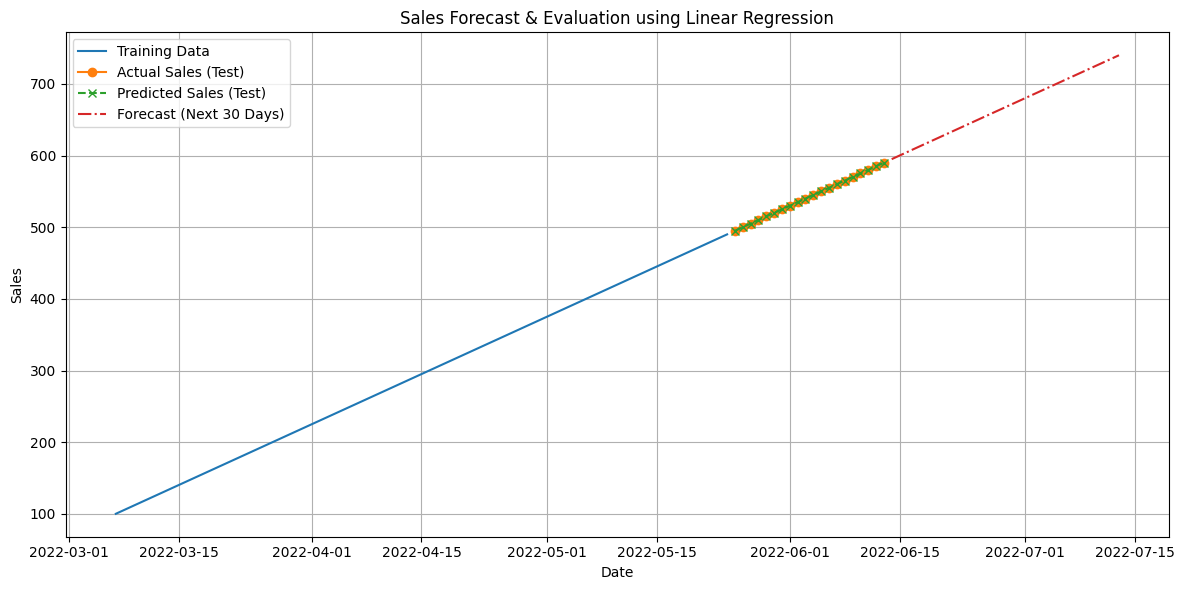

✅ Forecast saved to 'sales_forecast.csv'


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Data
df = pd.read_csv("../datasets/salesdata.csv")
df.rename(columns={'ds':'date','y':'sales'},inplace=True)
df['date'] = pd.to_datetime(df['date'])

# Step 2: Convert date to ordinal
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

# Step 3: Train-test split
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

X_train = train_df[['date_ordinal']]
y_train = train_df['sales']
X_test = test_df[['date_ordinal']]
y_test = test_df['sales']

# Step 4: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict on test data
y_pred = model.predict(X_test)

# Step 6: Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation on Test Data:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

# Step 7: Forecast next 30 days
future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=30)
future_df = pd.DataFrame({'date': future_dates})
future_df['date_ordinal'] = future_df['date'].map(pd.Timestamp.toordinal)
future_df['predicted_sales'] = model.predict(future_df[['date_ordinal']])

# Step 8: Plot
plt.figure(figsize=(12, 6))
plt.plot(train_df['date'], y_train, label='Training Data')
plt.plot(test_df['date'], y_test, label='Actual Sales (Test)', marker='o')
plt.plot(test_df['date'], y_pred, label='Predicted Sales (Test)', linestyle='--', marker='x')
plt.plot(future_df['date'], future_df['predicted_sales'], label='Forecast (Next 30 Days)', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast & Evaluation using Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Save forecast to CSV
future_df[['date', 'predicted_sales']].to_csv("sales_forecast_using_linearReg.csv", index=False)
print("✅ Forecast saved to 'sales_forecast.csv'")


# comparision between linear reg and random forest

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import numpy as np

# Load the dataset
df = pd.read_csv("../datasets/sales_data_sample.csv" ,encoding='latin-1')

# Parse ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Drop rows with missing ORDERDATE or SALES
df = df.dropna(subset=['ORDERDATE', 'SALES'])

# Convert ORDERDATE to ordinal for regression
df['ds_ordinal'] = df['ORDERDATE'].map(datetime.toordinal)

# Define X and y
X = df[['ds_ordinal']]
y = df['SALES']

# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, shuffle=False
    )
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- Metrics ---
print("Linear Regression:")
print("  MSE:", mean_squared_error(y_test, y_pred_lr))
print("  RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("  R² :", r2_score(y_test, y_pred_lr))

print("\nRandom Forest Regressor:")
print("  MSE:", mean_squared_error(y_test, y_pred_rf))
print("  RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("  R² :", r2_score(y_test, y_pred_rf))



Linear Regression:
  MSE: 1998131.1633962742
  RMSE: 1413.552674432854
  R² : -0.29090176395273093

Random Forest Regressor:
  MSE: 2395944.7618142217
  RMSE: 1547.8839626452047
  R² : -0.5479110561001181


In [9]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,ds_ordinal
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,731270
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,731342
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,731397
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,731452
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,731498


# visualization between the prediction of linear reg and random forest


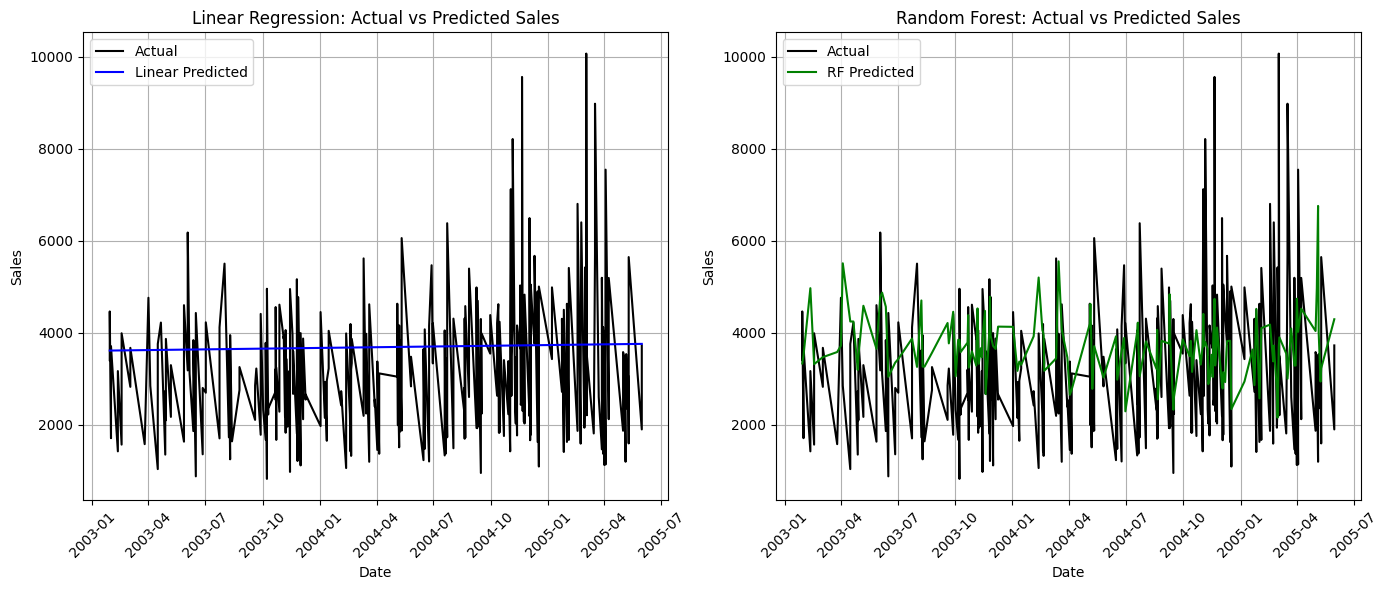

In [11]:
import matplotlib.pyplot as plt

# Sort test data for cleaner plot
X_test_sorted, y_test_sorted = zip(*sorted(zip(X_test['ds_ordinal'], y_test)))
_, y_pred_lr_sorted = zip(*sorted(zip(X_test['ds_ordinal'], y_pred_lr)))
_, y_pred_rf_sorted = zip(*sorted(zip(X_test['ds_ordinal'], y_pred_rf)))

# Convert ordinal to datetime for plotting
dates_sorted = [datetime.fromordinal(int(o)) for o in X_test_sorted]

# Plot
plt.figure(figsize=(14, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.plot(dates_sorted, y_test_sorted, label='Actual', color='black')
plt.plot(dates_sorted, y_pred_lr_sorted, label='Linear Predicted', color='blue')
plt.title('Linear Regression: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Random Forest Plot
plt.subplot(1, 2, 2)
plt.plot(dates_sorted, y_test_sorted, label='Actual', color='black')
plt.plot(dates_sorted, y_pred_rf_sorted, label='RF Predicted', color='green')
plt.title('Random Forest: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
